# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

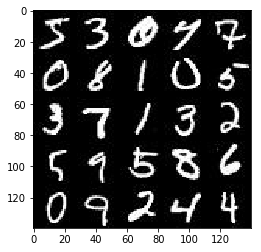

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot



mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

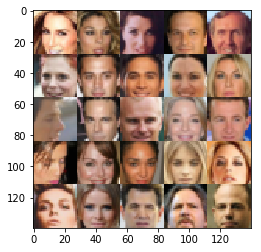

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\Nandhini\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [71]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input = tf.placeholder(tf.float32, [None,image_width, image_height,image_channels], name = "input")
    input_z = tf.placeholder(tf.float32, [None, z_dim], name = "input_z")
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")

    return input, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [238]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
   
    alpha = 0.2

    with tf.variable_scope('discriminator', reuse = reuse):
        
         
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha*x1, x1)
         
                 
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*bn2, bn2)
         
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*bn3, bn3)
         

        # Flatten it
        flat = tf.reshape(x3, (-1, 4*4*256))
         
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [239]:
def generator(z, out_channel_dim, is_train= True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2 
    with tf.variable_scope('generator' , reuse = not is_train):
         
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*128)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7,128))
         
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 64, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2, x2)
        
   
        
        x3 = tf.layers.conv2d_transpose(x2, 16, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training= is_train)
        x3 = tf.maximum(alpha*x3, x3)
        
                   
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides = 1, padding='same')
        out = tf.tanh(logits)
       
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [240]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [241]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)


    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [242]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [249]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
     
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    input_real, input_z, learningrate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss      = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt        = model_opt(d_loss, g_loss, learning_rate, beta1)
               
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images = batch_images * 2
                
                # TODO: Train Model
               # Sample random noise for G
                input_fake = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z : input_fake})
                          
                _ = sess.run(g_opt, feed_dict={input_real:batch_images,input_z: input_fake})         
                
            
                if steps % 100 == 0:
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)
                
                if steps % 10 == 0:

                    train_loss_d = d_loss.eval({input_z:input_fake, input_real:batch_images, })
                    train_loss_g = g_loss.eval({input_z:input_fake})

                    print("Epoch {}/{} ".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2  Discriminator Loss: 13.8136 Generator Loss: 0.6605
Epoch 1/2  Discriminator Loss: 5.0273 Generator Loss: 0.5886
Epoch 1/2  Discriminator Loss: 2.4942 Generator Loss: 3.6667
Epoch 1/2  Discriminator Loss: 5.5391 Generator Loss: 0.0163
Epoch 1/2  Discriminator Loss: 0.6727 Generator Loss: 1.8457
Epoch 1/2  Discriminator Loss: 1.5290 Generator Loss: 0.9853
Epoch 1/2  Discriminator Loss: 0.1141 Generator Loss: 2.9271
Epoch 1/2  Discriminator Loss: 0.1439 Generator Loss: 2.4559
Epoch 1/2  Discriminator Loss: 0.9891 Generator Loss: 2.6685


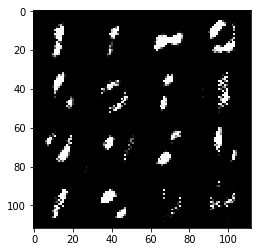

Epoch 1/2  Discriminator Loss: 1.1261 Generator Loss: 2.4874
Epoch 1/2  Discriminator Loss: 2.6141 Generator Loss: 1.4557
Epoch 1/2  Discriminator Loss: 1.6856 Generator Loss: 1.4326
Epoch 1/2  Discriminator Loss: 0.9293 Generator Loss: 0.6696
Epoch 1/2  Discriminator Loss: 3.0152 Generator Loss: 0.0894
Epoch 1/2  Discriminator Loss: 1.3877 Generator Loss: 0.7255
Epoch 1/2  Discriminator Loss: 0.9948 Generator Loss: 0.7370
Epoch 1/2  Discriminator Loss: 2.1874 Generator Loss: 0.9322
Epoch 1/2  Discriminator Loss: 1.0853 Generator Loss: 1.6112
Epoch 1/2  Discriminator Loss: 1.2807 Generator Loss: 2.4027


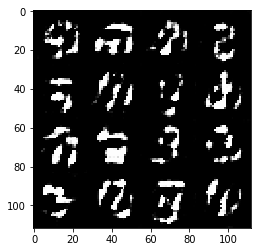

Epoch 1/2  Discriminator Loss: 1.6189 Generator Loss: 0.4666
Epoch 1/2  Discriminator Loss: 0.9864 Generator Loss: 0.8021
Epoch 1/2  Discriminator Loss: 4.5200 Generator Loss: 0.0237
Epoch 1/2  Discriminator Loss: 0.9873 Generator Loss: 0.6889
Epoch 1/2  Discriminator Loss: 0.5421 Generator Loss: 1.1609
Epoch 1/2  Discriminator Loss: 3.9042 Generator Loss: 0.0532
Epoch 1/2  Discriminator Loss: 1.7461 Generator Loss: 1.8683
Epoch 1/2  Discriminator Loss: 1.2484 Generator Loss: 1.0192
Epoch 1/2  Discriminator Loss: 1.4949 Generator Loss: 0.4167
Epoch 1/2  Discriminator Loss: 1.2102 Generator Loss: 0.5030


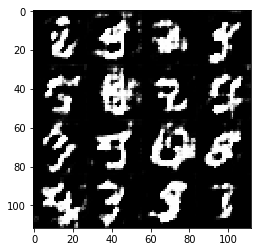

Epoch 1/2  Discriminator Loss: 0.9865 Generator Loss: 0.5266
Epoch 1/2  Discriminator Loss: 1.9421 Generator Loss: 0.8848
Epoch 1/2  Discriminator Loss: 2.1274 Generator Loss: 2.3065
Epoch 1/2  Discriminator Loss: 1.2018 Generator Loss: 0.7783
Epoch 1/2  Discriminator Loss: 1.3598 Generator Loss: 1.1385
Epoch 1/2  Discriminator Loss: 1.2207 Generator Loss: 1.1402
Epoch 1/2  Discriminator Loss: 1.1189 Generator Loss: 1.2940
Epoch 1/2  Discriminator Loss: 1.2475 Generator Loss: 1.1207
Epoch 1/2  Discriminator Loss: 1.7474 Generator Loss: 1.9097
Epoch 1/2  Discriminator Loss: 1.2214 Generator Loss: 0.9468


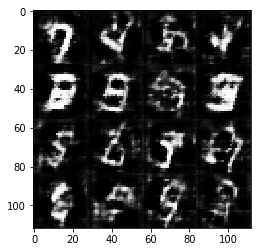

Epoch 1/2  Discriminator Loss: 1.3931 Generator Loss: 1.5748
Epoch 1/2  Discriminator Loss: 1.3348 Generator Loss: 1.5391
Epoch 1/2  Discriminator Loss: 1.1041 Generator Loss: 1.4280
Epoch 1/2  Discriminator Loss: 1.1650 Generator Loss: 0.9644
Epoch 1/2  Discriminator Loss: 1.4865 Generator Loss: 0.4068
Epoch 1/2  Discriminator Loss: 1.4187 Generator Loss: 0.4285
Epoch 1/2  Discriminator Loss: 1.2440 Generator Loss: 0.5549
Epoch 1/2  Discriminator Loss: 1.3916 Generator Loss: 0.4587
Epoch 1/2  Discriminator Loss: 1.6137 Generator Loss: 0.3033
Epoch 1/2  Discriminator Loss: 1.3881 Generator Loss: 0.4255


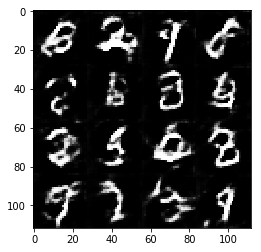

Epoch 1/2  Discriminator Loss: 1.3324 Generator Loss: 0.6027
Epoch 1/2  Discriminator Loss: 1.4984 Generator Loss: 0.3605
Epoch 1/2  Discriminator Loss: 1.1468 Generator Loss: 0.9567
Epoch 1/2  Discriminator Loss: 1.7785 Generator Loss: 0.2344
Epoch 1/2  Discriminator Loss: 1.3263 Generator Loss: 0.5281
Epoch 1/2  Discriminator Loss: 1.2018 Generator Loss: 1.5779
Epoch 1/2  Discriminator Loss: 1.1761 Generator Loss: 0.6693
Epoch 1/2  Discriminator Loss: 1.4309 Generator Loss: 0.3893
Epoch 1/2  Discriminator Loss: 1.2269 Generator Loss: 0.5168
Epoch 1/2  Discriminator Loss: 1.3270 Generator Loss: 0.5188


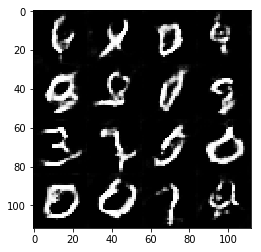

Epoch 1/2  Discriminator Loss: 1.3498 Generator Loss: 0.4317
Epoch 2/2  Discriminator Loss: 1.5660 Generator Loss: 0.3304
Epoch 2/2  Discriminator Loss: 1.5962 Generator Loss: 0.3319
Epoch 2/2  Discriminator Loss: 1.4516 Generator Loss: 0.4001
Epoch 2/2  Discriminator Loss: 1.2685 Generator Loss: 0.4900
Epoch 2/2  Discriminator Loss: 1.3812 Generator Loss: 0.4326
Epoch 2/2  Discriminator Loss: 1.3225 Generator Loss: 0.5276
Epoch 2/2  Discriminator Loss: 1.2610 Generator Loss: 0.5448
Epoch 2/2  Discriminator Loss: 1.4435 Generator Loss: 0.4234
Epoch 2/2  Discriminator Loss: 1.0708 Generator Loss: 1.1366


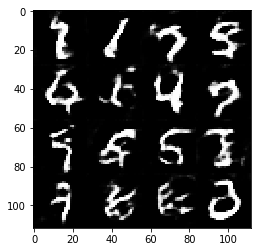

Epoch 2/2  Discriminator Loss: 1.2966 Generator Loss: 0.7177
Epoch 2/2  Discriminator Loss: 1.1602 Generator Loss: 0.8771
Epoch 2/2  Discriminator Loss: 1.2476 Generator Loss: 1.1020
Epoch 2/2  Discriminator Loss: 1.1313 Generator Loss: 1.1179
Epoch 2/2  Discriminator Loss: 1.1877 Generator Loss: 0.9130
Epoch 2/2  Discriminator Loss: 1.2059 Generator Loss: 1.2583
Epoch 2/2  Discriminator Loss: 1.1484 Generator Loss: 1.2961
Epoch 2/2  Discriminator Loss: 1.5294 Generator Loss: 1.6090
Epoch 2/2  Discriminator Loss: 1.1117 Generator Loss: 0.6891
Epoch 2/2  Discriminator Loss: 1.3404 Generator Loss: 0.8891


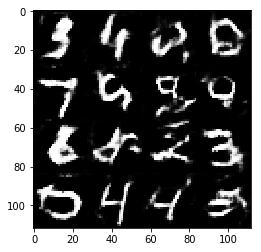

Epoch 2/2  Discriminator Loss: 1.2375 Generator Loss: 0.8645
Epoch 2/2  Discriminator Loss: 1.1047 Generator Loss: 1.0307
Epoch 2/2  Discriminator Loss: 1.3039 Generator Loss: 1.2663
Epoch 2/2  Discriminator Loss: 1.2676 Generator Loss: 0.5366
Epoch 2/2  Discriminator Loss: 1.1134 Generator Loss: 0.8025
Epoch 2/2  Discriminator Loss: 1.1668 Generator Loss: 1.1319
Epoch 2/2  Discriminator Loss: 1.2727 Generator Loss: 1.3986
Epoch 2/2  Discriminator Loss: 1.0407 Generator Loss: 0.9653
Epoch 2/2  Discriminator Loss: 1.2158 Generator Loss: 1.6789
Epoch 2/2  Discriminator Loss: 1.1295 Generator Loss: 1.3072


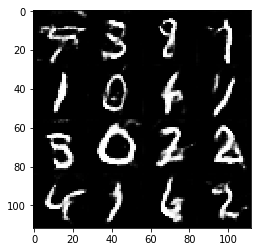

Epoch 2/2  Discriminator Loss: 1.1849 Generator Loss: 1.4349
Epoch 2/2  Discriminator Loss: 1.0662 Generator Loss: 0.9242
Epoch 2/2  Discriminator Loss: 1.1294 Generator Loss: 1.2255
Epoch 2/2  Discriminator Loss: 1.1549 Generator Loss: 1.1909
Epoch 2/2  Discriminator Loss: 1.2829 Generator Loss: 1.3771
Epoch 2/2  Discriminator Loss: 1.1471 Generator Loss: 1.5523
Epoch 2/2  Discriminator Loss: 0.9835 Generator Loss: 1.3416
Epoch 2/2  Discriminator Loss: 1.0166 Generator Loss: 1.1441
Epoch 2/2  Discriminator Loss: 1.3193 Generator Loss: 1.1926
Epoch 2/2  Discriminator Loss: 1.2196 Generator Loss: 1.0224


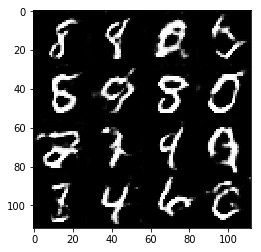

Epoch 2/2  Discriminator Loss: 1.0908 Generator Loss: 1.3888
Epoch 2/2  Discriminator Loss: 1.3058 Generator Loss: 1.6980
Epoch 2/2  Discriminator Loss: 1.0676 Generator Loss: 0.9813
Epoch 2/2  Discriminator Loss: 1.1852 Generator Loss: 0.7727
Epoch 2/2  Discriminator Loss: 1.1505 Generator Loss: 1.1737
Epoch 2/2  Discriminator Loss: 1.1393 Generator Loss: 1.0357
Epoch 2/2  Discriminator Loss: 1.0546 Generator Loss: 1.0415
Epoch 2/2  Discriminator Loss: 1.1328 Generator Loss: 0.7431
Epoch 2/2  Discriminator Loss: 1.4053 Generator Loss: 0.4642
Epoch 2/2  Discriminator Loss: 1.3545 Generator Loss: 0.4857


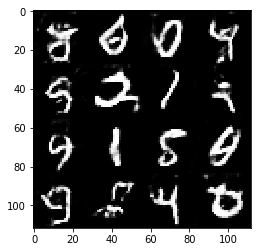

Epoch 2/2  Discriminator Loss: 1.4332 Generator Loss: 0.4226
Epoch 2/2  Discriminator Loss: 1.6183 Generator Loss: 0.3166
Epoch 2/2  Discriminator Loss: 1.0521 Generator Loss: 1.0798
Epoch 2/2  Discriminator Loss: 1.1605 Generator Loss: 1.0363
Epoch 2/2  Discriminator Loss: 0.9760 Generator Loss: 1.2162
Epoch 2/2  Discriminator Loss: 0.9668 Generator Loss: 1.0112
Epoch 2/2  Discriminator Loss: 1.0907 Generator Loss: 1.1272
Epoch 2/2  Discriminator Loss: 1.7277 Generator Loss: 1.9891
Epoch 2/2  Discriminator Loss: 1.0291 Generator Loss: 1.2935
Epoch 2/2  Discriminator Loss: 1.3441 Generator Loss: 1.6754


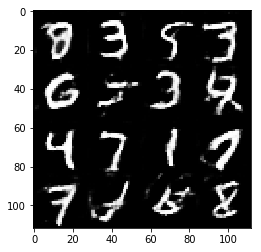

Epoch 2/2  Discriminator Loss: 1.3295 Generator Loss: 0.4164


In [270]:
batch_size = 100
z_dim = 100
learning_rate = 0.01
beta1 = 0.0001


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1  Discriminator Loss: 4.9112 Generator Loss: 4.6384
Epoch 1/1  Discriminator Loss: 3.0394 Generator Loss: 3.1671
Epoch 1/1  Discriminator Loss: 4.6869 Generator Loss: 1.1306
Epoch 1/1  Discriminator Loss: 2.0067 Generator Loss: 0.4040
Epoch 1/1  Discriminator Loss: 3.6861 Generator Loss: 0.1852
Epoch 1/1  Discriminator Loss: 3.2841 Generator Loss: 1.2124
Epoch 1/1  Discriminator Loss: 1.6261 Generator Loss: 1.3047
Epoch 1/1  Discriminator Loss: 1.7526 Generator Loss: 0.8882
Epoch 1/1  Discriminator Loss: 1.5141 Generator Loss: 0.9534


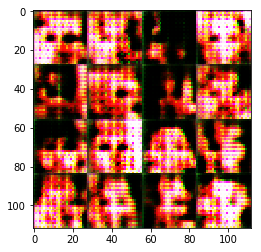

Epoch 1/1  Discriminator Loss: 1.1857 Generator Loss: 1.0329
Epoch 1/1  Discriminator Loss: 1.6899 Generator Loss: 1.4307
Epoch 1/1  Discriminator Loss: 1.6835 Generator Loss: 0.4441
Epoch 1/1  Discriminator Loss: 1.5752 Generator Loss: 0.3688
Epoch 1/1  Discriminator Loss: 1.0865 Generator Loss: 1.0634
Epoch 1/1  Discriminator Loss: 1.9664 Generator Loss: 0.8046
Epoch 1/1  Discriminator Loss: 1.5303 Generator Loss: 0.5697
Epoch 1/1  Discriminator Loss: 1.4869 Generator Loss: 0.5237
Epoch 1/1  Discriminator Loss: 1.5687 Generator Loss: 0.5247
Epoch 1/1  Discriminator Loss: 1.4333 Generator Loss: 0.4000


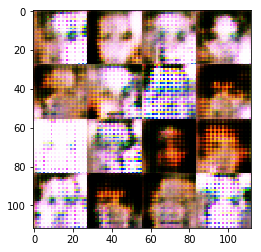

Epoch 1/1  Discriminator Loss: 1.0469 Generator Loss: 0.9196
Epoch 1/1  Discriminator Loss: 1.1787 Generator Loss: 0.6836
Epoch 1/1  Discriminator Loss: 1.8618 Generator Loss: 0.3562
Epoch 1/1  Discriminator Loss: 1.5756 Generator Loss: 0.6493
Epoch 1/1  Discriminator Loss: 1.2211 Generator Loss: 1.2377
Epoch 1/1  Discriminator Loss: 0.9249 Generator Loss: 1.0390
Epoch 1/1  Discriminator Loss: 1.5128 Generator Loss: 0.5331
Epoch 1/1  Discriminator Loss: 1.4830 Generator Loss: 0.6199
Epoch 1/1  Discriminator Loss: 1.4396 Generator Loss: 0.5931
Epoch 1/1  Discriminator Loss: 1.3581 Generator Loss: 0.5573


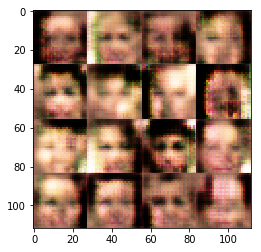

Epoch 1/1  Discriminator Loss: 1.4156 Generator Loss: 0.5325
Epoch 1/1  Discriminator Loss: 1.4423 Generator Loss: 0.5125
Epoch 1/1  Discriminator Loss: 1.4729 Generator Loss: 0.5439
Epoch 1/1  Discriminator Loss: 1.5230 Generator Loss: 0.4119
Epoch 1/1  Discriminator Loss: 1.4682 Generator Loss: 0.5335
Epoch 1/1  Discriminator Loss: 1.4550 Generator Loss: 0.5656
Epoch 1/1  Discriminator Loss: 1.4641 Generator Loss: 0.5066
Epoch 1/1  Discriminator Loss: 1.3982 Generator Loss: 0.6913
Epoch 1/1  Discriminator Loss: 1.3579 Generator Loss: 0.7220
Epoch 1/1  Discriminator Loss: 1.4201 Generator Loss: 0.8106


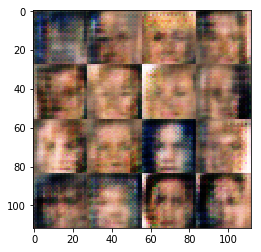

Epoch 1/1  Discriminator Loss: 1.3878 Generator Loss: 0.6523
Epoch 1/1  Discriminator Loss: 1.4887 Generator Loss: 0.8787
Epoch 1/1  Discriminator Loss: 1.4242 Generator Loss: 0.5955
Epoch 1/1  Discriminator Loss: 1.4345 Generator Loss: 0.9255
Epoch 1/1  Discriminator Loss: 1.4852 Generator Loss: 1.0734
Epoch 1/1  Discriminator Loss: 1.3833 Generator Loss: 0.7453
Epoch 1/1  Discriminator Loss: 1.3669 Generator Loss: 0.7729
Epoch 1/1  Discriminator Loss: 1.4467 Generator Loss: 0.8023
Epoch 1/1  Discriminator Loss: 1.3665 Generator Loss: 0.7449
Epoch 1/1  Discriminator Loss: 1.4879 Generator Loss: 0.9708


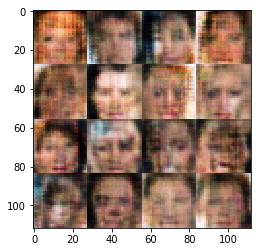

Epoch 1/1  Discriminator Loss: 1.4121 Generator Loss: 0.9044
Epoch 1/1  Discriminator Loss: 1.3813 Generator Loss: 0.7795
Epoch 1/1  Discriminator Loss: 1.3927 Generator Loss: 0.8320
Epoch 1/1  Discriminator Loss: 1.4863 Generator Loss: 0.7394
Epoch 1/1  Discriminator Loss: 1.3901 Generator Loss: 0.5791
Epoch 1/1  Discriminator Loss: 1.4275 Generator Loss: 0.5680
Epoch 1/1  Discriminator Loss: 1.3804 Generator Loss: 0.7209
Epoch 1/1  Discriminator Loss: 1.3849 Generator Loss: 0.6204
Epoch 1/1  Discriminator Loss: 1.3977 Generator Loss: 0.8679
Epoch 1/1  Discriminator Loss: 1.4223 Generator Loss: 0.8543


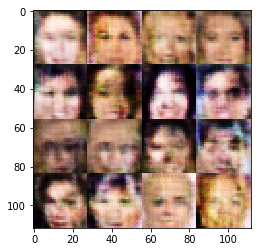

Epoch 1/1  Discriminator Loss: 1.3662 Generator Loss: 0.8092
Epoch 1/1  Discriminator Loss: 1.3789 Generator Loss: 0.7043
Epoch 1/1  Discriminator Loss: 1.4096 Generator Loss: 0.5885
Epoch 1/1  Discriminator Loss: 1.3793 Generator Loss: 0.5954
Epoch 1/1  Discriminator Loss: 1.3482 Generator Loss: 0.6040
Epoch 1/1  Discriminator Loss: 1.4025 Generator Loss: 0.5763
Epoch 1/1  Discriminator Loss: 1.3791 Generator Loss: 0.6590
Epoch 1/1  Discriminator Loss: 1.4627 Generator Loss: 0.4765
Epoch 1/1  Discriminator Loss: 1.3887 Generator Loss: 0.5743
Epoch 1/1  Discriminator Loss: 1.4303 Generator Loss: 0.4846


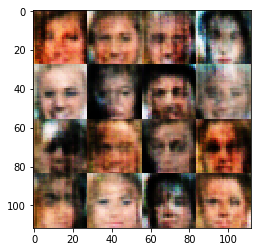

Epoch 1/1  Discriminator Loss: 1.3913 Generator Loss: 0.5440
Epoch 1/1  Discriminator Loss: 1.4040 Generator Loss: 0.6220
Epoch 1/1  Discriminator Loss: 1.3741 Generator Loss: 0.5905
Epoch 1/1  Discriminator Loss: 1.4199 Generator Loss: 0.5682
Epoch 1/1  Discriminator Loss: 1.4190 Generator Loss: 0.5566
Epoch 1/1  Discriminator Loss: 1.3540 Generator Loss: 0.5866
Epoch 1/1  Discriminator Loss: 1.5208 Generator Loss: 0.9456
Epoch 1/1  Discriminator Loss: 1.3744 Generator Loss: 0.8423
Epoch 1/1  Discriminator Loss: 1.3757 Generator Loss: 0.7027
Epoch 1/1  Discriminator Loss: 1.3906 Generator Loss: 0.6602


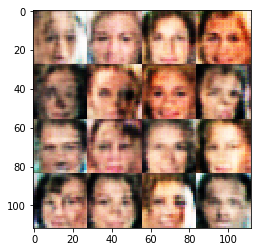

Epoch 1/1  Discriminator Loss: 1.4019 Generator Loss: 0.5408
Epoch 1/1  Discriminator Loss: 1.3255 Generator Loss: 0.5460
Epoch 1/1  Discriminator Loss: 3.3783 Generator Loss: 3.9511
Epoch 1/1  Discriminator Loss: 1.1812 Generator Loss: 0.5663
Epoch 1/1  Discriminator Loss: 1.3568 Generator Loss: 0.6414
Epoch 1/1  Discriminator Loss: 1.3820 Generator Loss: 0.7848
Epoch 1/1  Discriminator Loss: 1.3641 Generator Loss: 0.6957
Epoch 1/1  Discriminator Loss: 1.3829 Generator Loss: 0.6213
Epoch 1/1  Discriminator Loss: 1.3620 Generator Loss: 0.6636
Epoch 1/1  Discriminator Loss: 1.3701 Generator Loss: 0.8242


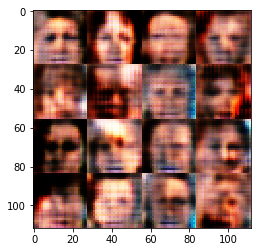

Epoch 1/1  Discriminator Loss: 1.3860 Generator Loss: 0.6842
Epoch 1/1  Discriminator Loss: 1.4106 Generator Loss: 0.7958
Epoch 1/1  Discriminator Loss: 1.3841 Generator Loss: 0.6585
Epoch 1/1  Discriminator Loss: 1.4001 Generator Loss: 0.7953
Epoch 1/1  Discriminator Loss: 1.4569 Generator Loss: 0.9663
Epoch 1/1  Discriminator Loss: 1.3678 Generator Loss: 0.7899
Epoch 1/1  Discriminator Loss: 1.3907 Generator Loss: 0.6248
Epoch 1/1  Discriminator Loss: 1.3869 Generator Loss: 0.6602
Epoch 1/1  Discriminator Loss: 1.3896 Generator Loss: 0.6111
Epoch 1/1  Discriminator Loss: 1.3733 Generator Loss: 0.7219


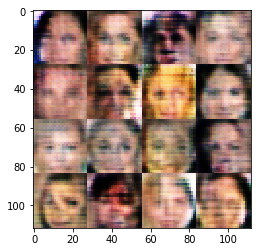

Epoch 1/1  Discriminator Loss: 1.3800 Generator Loss: 0.7304
Epoch 1/1  Discriminator Loss: 1.3966 Generator Loss: 0.7348
Epoch 1/1  Discriminator Loss: 1.3706 Generator Loss: 0.7091
Epoch 1/1  Discriminator Loss: 1.3969 Generator Loss: 0.7640
Epoch 1/1  Discriminator Loss: 1.3724 Generator Loss: 0.6768
Epoch 1/1  Discriminator Loss: 1.3729 Generator Loss: 0.6525
Epoch 1/1  Discriminator Loss: 1.3796 Generator Loss: 0.7507
Epoch 1/1  Discriminator Loss: 1.3773 Generator Loss: 0.7439
Epoch 1/1  Discriminator Loss: 1.3900 Generator Loss: 0.7819
Epoch 1/1  Discriminator Loss: 1.3778 Generator Loss: 0.7247


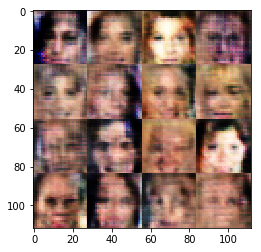

Epoch 1/1  Discriminator Loss: 1.3841 Generator Loss: 0.6176
Epoch 1/1  Discriminator Loss: 1.3890 Generator Loss: 0.6331
Epoch 1/1  Discriminator Loss: 1.3943 Generator Loss: 0.7858
Epoch 1/1  Discriminator Loss: 1.3811 Generator Loss: 0.7152
Epoch 1/1  Discriminator Loss: 1.3536 Generator Loss: 0.7163
Epoch 1/1  Discriminator Loss: 1.3898 Generator Loss: 0.6627
Epoch 1/1  Discriminator Loss: 1.3663 Generator Loss: 0.7199
Epoch 1/1  Discriminator Loss: 1.4006 Generator Loss: 0.6967
Epoch 1/1  Discriminator Loss: 1.3795 Generator Loss: 0.7026
Epoch 1/1  Discriminator Loss: 1.3829 Generator Loss: 0.6494


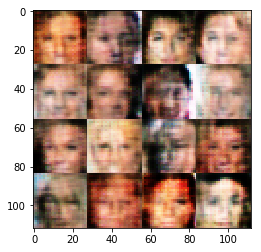

Epoch 1/1  Discriminator Loss: 1.3822 Generator Loss: 0.6789
Epoch 1/1  Discriminator Loss: 1.3874 Generator Loss: 0.6559
Epoch 1/1  Discriminator Loss: 1.3735 Generator Loss: 0.6926
Epoch 1/1  Discriminator Loss: 1.3731 Generator Loss: 0.7025
Epoch 1/1  Discriminator Loss: 1.3736 Generator Loss: 0.7138
Epoch 1/1  Discriminator Loss: 1.3773 Generator Loss: 0.6743
Epoch 1/1  Discriminator Loss: 1.3920 Generator Loss: 0.6180
Epoch 1/1  Discriminator Loss: 1.3835 Generator Loss: 0.6534
Epoch 1/1  Discriminator Loss: 1.3843 Generator Loss: 0.6575
Epoch 1/1  Discriminator Loss: 1.3892 Generator Loss: 0.6987


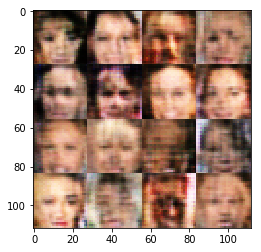

Epoch 1/1  Discriminator Loss: 1.3902 Generator Loss: 0.6827
Epoch 1/1  Discriminator Loss: 1.3712 Generator Loss: 0.6729
Epoch 1/1  Discriminator Loss: 1.3771 Generator Loss: 0.7331
Epoch 1/1  Discriminator Loss: 1.3757 Generator Loss: 0.7507
Epoch 1/1  Discriminator Loss: 1.3806 Generator Loss: 0.6653
Epoch 1/1  Discriminator Loss: 1.3747 Generator Loss: 0.6889
Epoch 1/1  Discriminator Loss: 1.3726 Generator Loss: 0.7174
Epoch 1/1  Discriminator Loss: 1.3908 Generator Loss: 0.6795
Epoch 1/1  Discriminator Loss: 1.3850 Generator Loss: 0.6803
Epoch 1/1  Discriminator Loss: 1.3782 Generator Loss: 0.6905


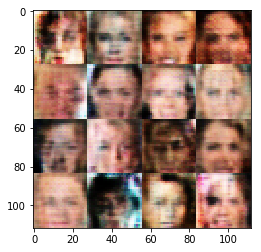

Epoch 1/1  Discriminator Loss: 1.3802 Generator Loss: 0.7053
Epoch 1/1  Discriminator Loss: 1.3815 Generator Loss: 0.6725
Epoch 1/1  Discriminator Loss: 1.3768 Generator Loss: 0.6644
Epoch 1/1  Discriminator Loss: 1.3630 Generator Loss: 0.7448
Epoch 1/1  Discriminator Loss: 1.3814 Generator Loss: 0.7070
Epoch 1/1  Discriminator Loss: 1.3801 Generator Loss: 0.7386
Epoch 1/1  Discriminator Loss: 1.3745 Generator Loss: 0.7474
Epoch 1/1  Discriminator Loss: 1.3731 Generator Loss: 0.7005
Epoch 1/1  Discriminator Loss: 1.3795 Generator Loss: 0.6929
Epoch 1/1  Discriminator Loss: 1.3695 Generator Loss: 0.7398


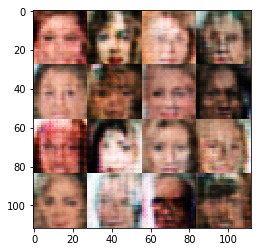

Epoch 1/1  Discriminator Loss: 1.3896 Generator Loss: 0.7117
Epoch 1/1  Discriminator Loss: 1.3823 Generator Loss: 0.7402
Epoch 1/1  Discriminator Loss: 1.3837 Generator Loss: 0.6781
Epoch 1/1  Discriminator Loss: 1.3740 Generator Loss: 0.6565
Epoch 1/1  Discriminator Loss: 1.3947 Generator Loss: 0.6551
Epoch 1/1  Discriminator Loss: 1.3818 Generator Loss: 0.7100
Epoch 1/1  Discriminator Loss: 1.3745 Generator Loss: 0.7026
Epoch 1/1  Discriminator Loss: 1.3957 Generator Loss: 0.7069
Epoch 1/1  Discriminator Loss: 1.3869 Generator Loss: 0.7163
Epoch 1/1  Discriminator Loss: 1.3701 Generator Loss: 0.6813


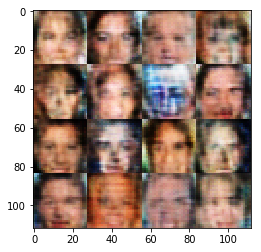

Epoch 1/1  Discriminator Loss: 1.3839 Generator Loss: 0.7110
Epoch 1/1  Discriminator Loss: 1.3878 Generator Loss: 0.7199
Epoch 1/1  Discriminator Loss: 1.3727 Generator Loss: 0.7151
Epoch 1/1  Discriminator Loss: 1.3980 Generator Loss: 0.6956
Epoch 1/1  Discriminator Loss: 1.3610 Generator Loss: 0.7309
Epoch 1/1  Discriminator Loss: 1.3932 Generator Loss: 0.7643
Epoch 1/1  Discriminator Loss: 1.3768 Generator Loss: 0.6985
Epoch 1/1  Discriminator Loss: 1.3783 Generator Loss: 0.7060
Epoch 1/1  Discriminator Loss: 1.3857 Generator Loss: 0.7685
Epoch 1/1  Discriminator Loss: 1.3821 Generator Loss: 0.6856


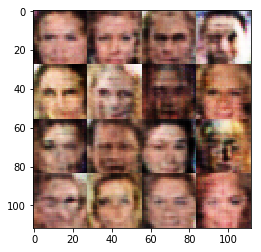

Epoch 1/1  Discriminator Loss: 1.3783 Generator Loss: 0.6804
Epoch 1/1  Discriminator Loss: 1.3889 Generator Loss: 0.7016
Epoch 1/1  Discriminator Loss: 1.3787 Generator Loss: 0.6456
Epoch 1/1  Discriminator Loss: 1.3803 Generator Loss: 0.6860
Epoch 1/1  Discriminator Loss: 1.3675 Generator Loss: 0.7432
Epoch 1/1  Discriminator Loss: 1.3950 Generator Loss: 0.7624
Epoch 1/1  Discriminator Loss: 1.3734 Generator Loss: 0.7157
Epoch 1/1  Discriminator Loss: 1.3956 Generator Loss: 0.6397
Epoch 1/1  Discriminator Loss: 1.3754 Generator Loss: 0.6669
Epoch 1/1  Discriminator Loss: 1.3702 Generator Loss: 0.6617


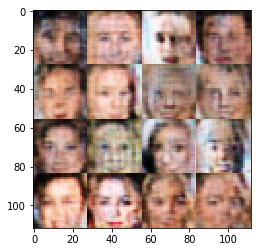

Epoch 1/1  Discriminator Loss: 1.3803 Generator Loss: 0.6783
Epoch 1/1  Discriminator Loss: 1.3889 Generator Loss: 0.6952
Epoch 1/1  Discriminator Loss: 1.3851 Generator Loss: 0.6574
Epoch 1/1  Discriminator Loss: 1.3856 Generator Loss: 0.6618
Epoch 1/1  Discriminator Loss: 1.3815 Generator Loss: 0.7183
Epoch 1/1  Discriminator Loss: 1.3804 Generator Loss: 0.6732
Epoch 1/1  Discriminator Loss: 1.3823 Generator Loss: 0.7023
Epoch 1/1  Discriminator Loss: 1.3864 Generator Loss: 0.7623
Epoch 1/1  Discriminator Loss: 1.3946 Generator Loss: 0.7842
Epoch 1/1  Discriminator Loss: 1.3839 Generator Loss: 0.7656


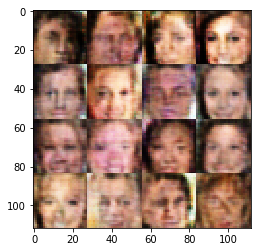

Epoch 1/1  Discriminator Loss: 1.3753 Generator Loss: 0.6762
Epoch 1/1  Discriminator Loss: 1.3823 Generator Loss: 0.6340
Epoch 1/1  Discriminator Loss: 1.3886 Generator Loss: 0.6550
Epoch 1/1  Discriminator Loss: 1.3875 Generator Loss: 0.6876
Epoch 1/1  Discriminator Loss: 1.3892 Generator Loss: 0.7552
Epoch 1/1  Discriminator Loss: 1.3852 Generator Loss: 0.7376
Epoch 1/1  Discriminator Loss: 1.3957 Generator Loss: 0.7801
Epoch 1/1  Discriminator Loss: 1.3673 Generator Loss: 0.6975
Epoch 1/1  Discriminator Loss: 1.3829 Generator Loss: 0.7427
Epoch 1/1  Discriminator Loss: 1.3948 Generator Loss: 0.7999


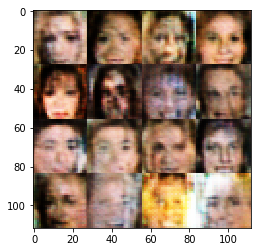

Epoch 1/1  Discriminator Loss: 1.3795 Generator Loss: 0.7194
Epoch 1/1  Discriminator Loss: 1.3826 Generator Loss: 0.6683
Epoch 1/1  Discriminator Loss: 1.3637 Generator Loss: 0.6771


In [275]:
batch_size = 100
z_dim = 100
learning_rate = 0.01
beta1 = 0.0001


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)



### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.